In [22]:
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
path = os.getcwd()

read from CSV


In [23]:
def read_file(file_name):
    data = pd.read_csv(path+'/03-digits-dataset/'+file_name)
    y=data[data.columns[0]].as_matrix()
    x=data.drop(data.columns[[0]], axis=1).as_matrix()
    return  x,y

In [24]:
train_x, train_y = read_file("train.csv")

In [25]:
#Test Data
test_x = pd.read_csv(path + '/03-digits-dataset/test.csv').as_matrix()

In [26]:
test_y=pd.read_csv(path + '/03-digits-dataset/out.csv')
test_y=test_y[test_y.columns[1]]

In [27]:
def display_digit(x, y):
    pixels = x.reshape((28, 28))
    label = y
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()
   

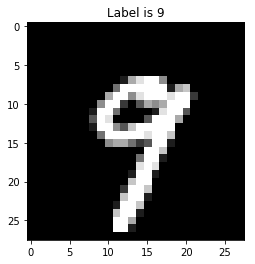

In [29]:
index=232
display_digit(test_x[index],test_y[index])

Dimensionality Reduction: apply PCA to both the training and testing images to reduce
their dimensionality while preserving a given percentage (e.g. 80 %) of the variance of the
dataset. In Python you may use the sklearn functionality: from sklearn.decomposition
import PCA.

In [30]:
def pca_dim_reduction(X, X_test, desired_var):
    # Check how many principle components needed for desired variance
    pca = PCA()
    pca.fit(X)
    reached_var = 0 
    for v in range(len(pca.explained_variance_ratio_)):
        reached_var = reached_var + pca.explained_variance_ratio_[v]
        if reached_var >= desired_var:
            break
    # PCA with desired number ov principle components
    pca2 = PCA(n_components=v+1)
    X = pca2.fit_transform(X)
    X_test = pca2.transform(X_test)
    print('*** PCA: reached variance: %2.4f, Numb. Dim.: %2.0f ***' % (reached_var, v+1))
    return X,X_test, reached_var, v+1

In [31]:
train_x.shape

(42000, 784)

In [32]:
pca_train_x,pca_test_x,reached,v =  pca_dim_reduction(train_x,test_x,0.8)

*** PCA: reached variance: 0.8003, Numb. Dim.: 43 ***


In [35]:
test_y

0        2
1        0
2        9
3        9
4        3
5        7
6        0
7        3
8        0
9        3
10       5
11       7
12       4
13       0
14       4
15       3
16       3
17       1
18       9
19       0
20       9
21       1
22       1
23       5
24       7
25       4
26       2
27       7
28       4
29       7
        ..
27970    5
27971    0
27972    4
27973    8
27974    0
27975    3
27976    6
27977    0
27978    1
27979    9
27980    3
27981    1
27982    1
27983    0
27984    4
27985    5
27986    2
27987    2
27988    9
27989    6
27990    7
27991    6
27992    1
27993    9
27994    7
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, dtype: int64

In [36]:
test_y_2=binary_dataset(3,test_y)

NameError: name 'binary_dataset' is not defined

In [ ]:
test_y_2

Binary classification: redefine the problem as a binary classification task. Write a function
that receives the chosen digit to classify as input and returns the corresponding binary training
labels (E.g. use the function to choose digit 5, then all of the 5s in the training set will
get label 1 while the remaining of the digits will get label 0).

In [37]:
def binary_dataset(digit, y):
    y_new=y.copy()
    y_new[y_new != digit] = 0
    y_new[y_new == digit] = 1
    return y_new

In [38]:
train_y_2=binary_dataset(2,train_y)

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y_2, test_size=0.15, random_state=42)

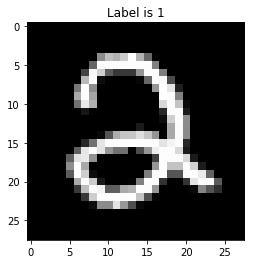

In [39]:
index=2
display_digit(X_train[index],y_train[index])